Q: Fit some of the non-linear models investigated in this chapter to the Auto data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.

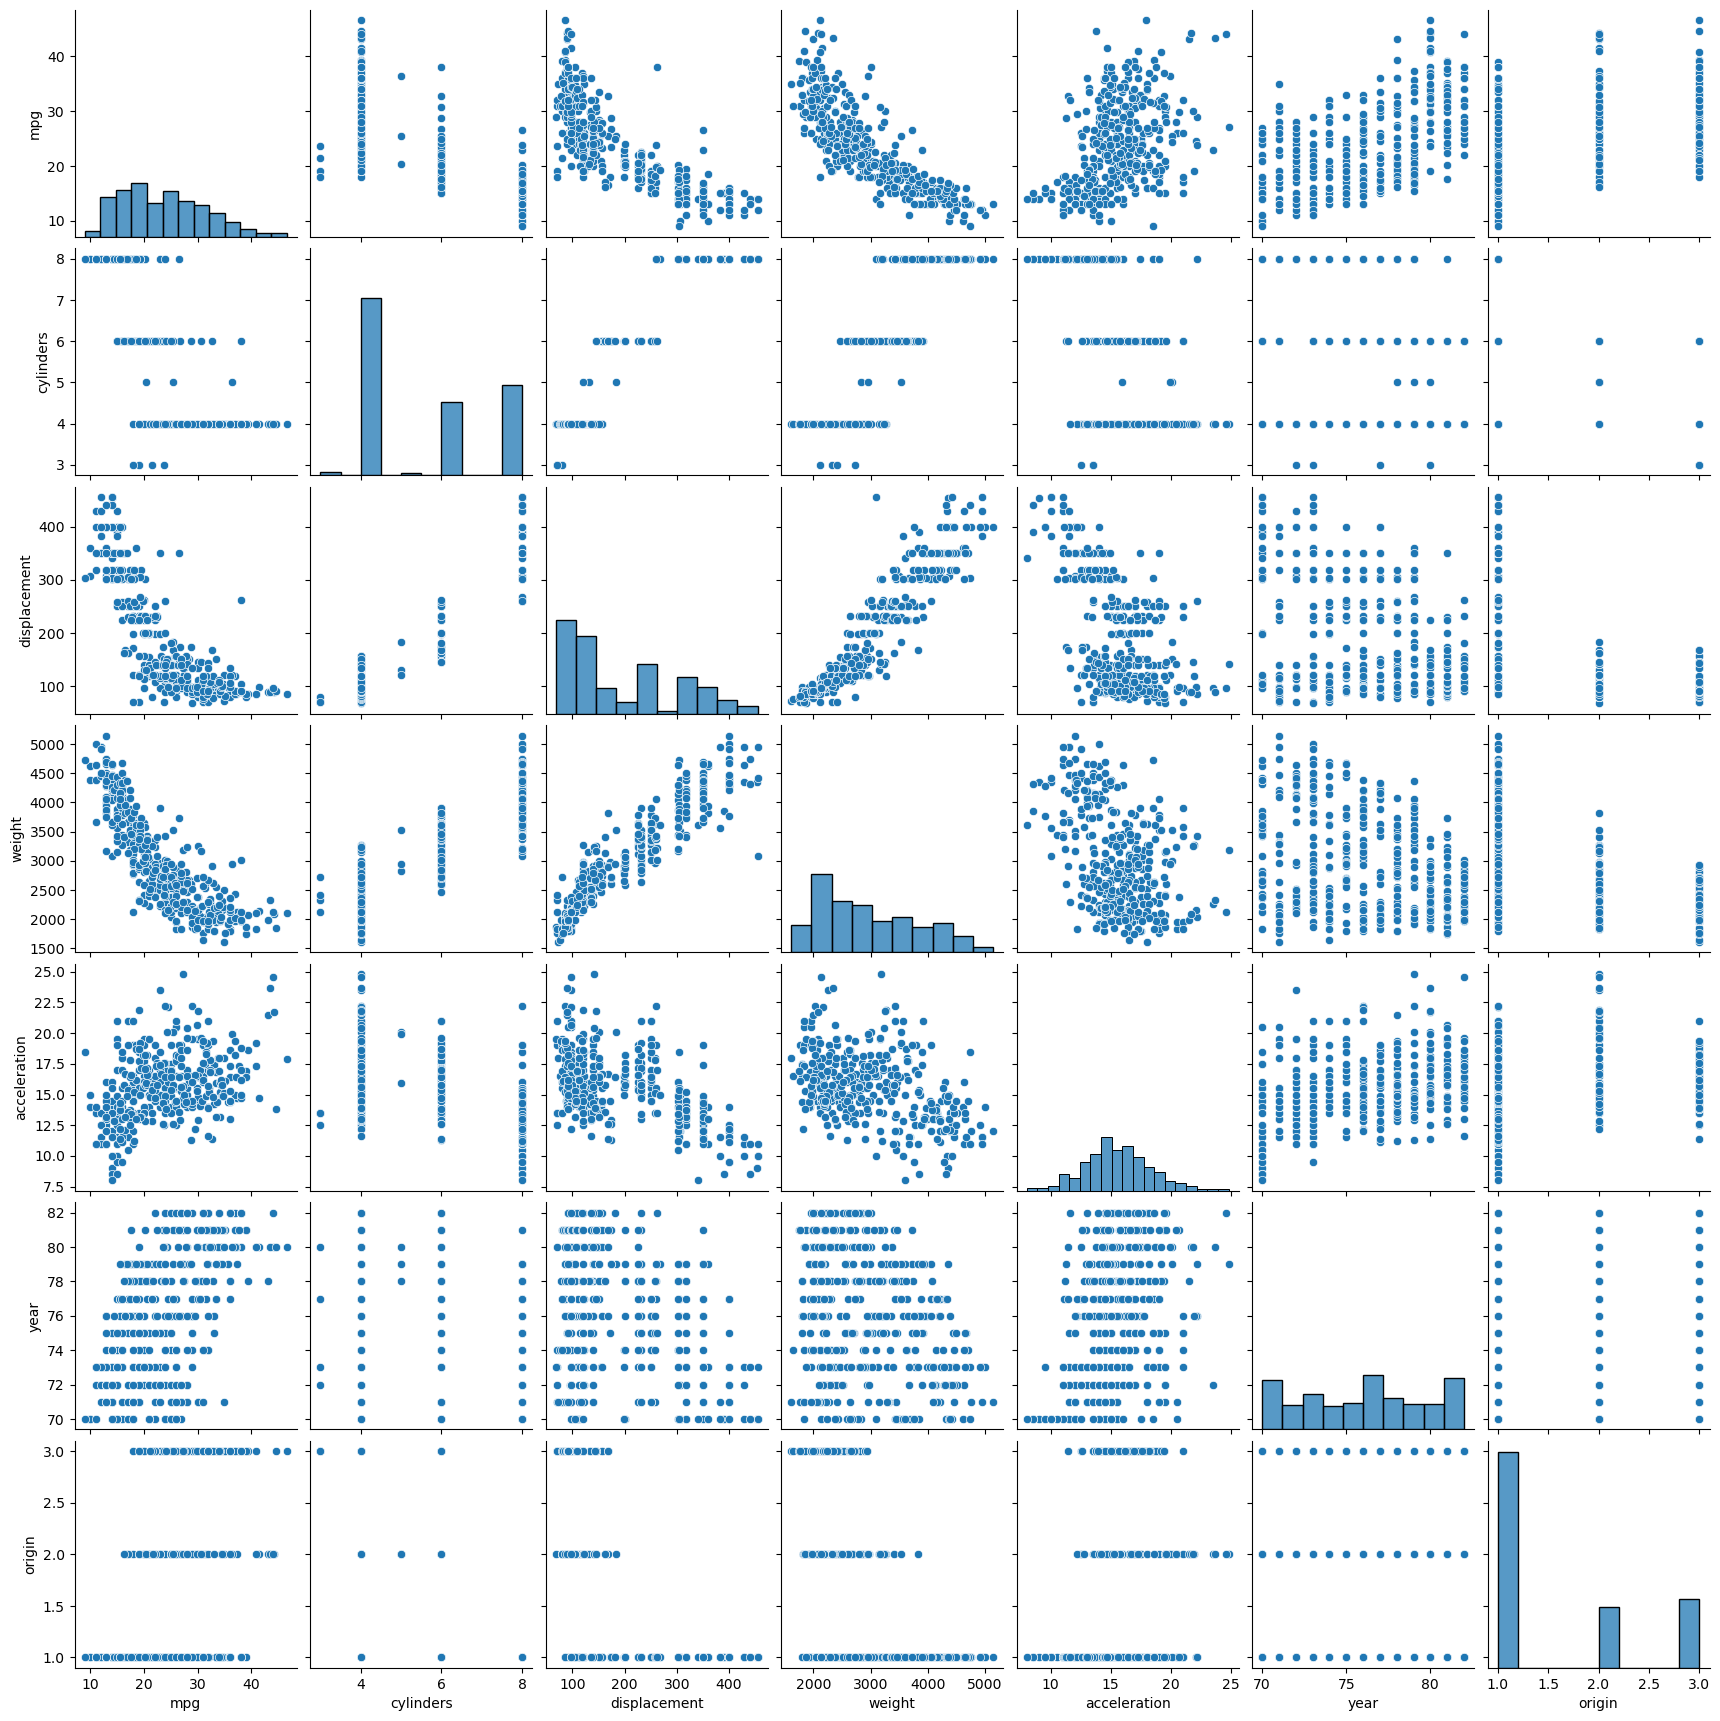

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Auto.csv")

sns.pairplot(df.drop(columns=[df.columns[8]]))
plt.show()

I am going to focus on relationships with mpg here, as I want to adapt this question slightly and confirm that using non-linear models provides better results in predicting mpg than we got in previous chapters through using linear methods.

In [22]:
df['origin'] = pd.Categorical(df['origin'], categories=[1, 2, 3])

df['brand'] = df['name'].str.split(" ").str[0]
df['brand'] = df['brand'].replace({"vokswagen": "volkswagen", "vw": "volkswagen", "toyouta": "toyota", "chevroelt": "chevrolet", "chevy": "chevrolet", "maxda": "mazda"})
top_brands = df['brand'].value_counts().nlargest(9).index.tolist()
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'uncommon')

df = df.drop(columns=['name'])

df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,brand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
5,15.0,8,429.0,198,4341,10.0,70,1,ford
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth
8,14.0,8,455.0,225,4425,10.0,70,1,uncommon
9,15.0,8,390.0,190,3850,8.5,70,1,amc


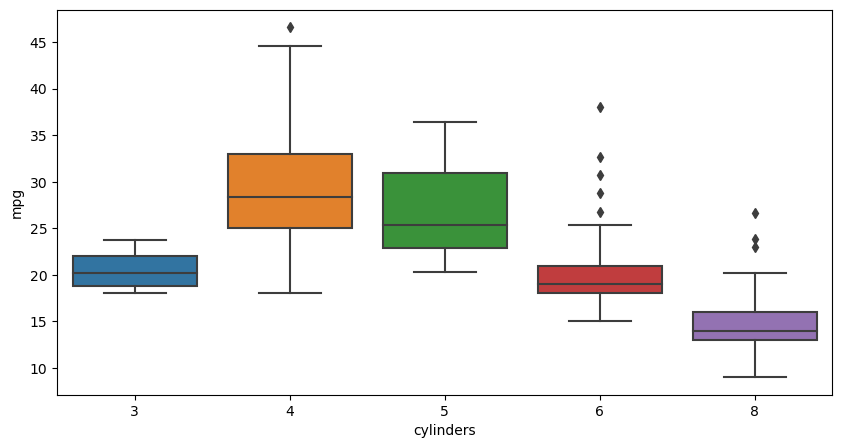

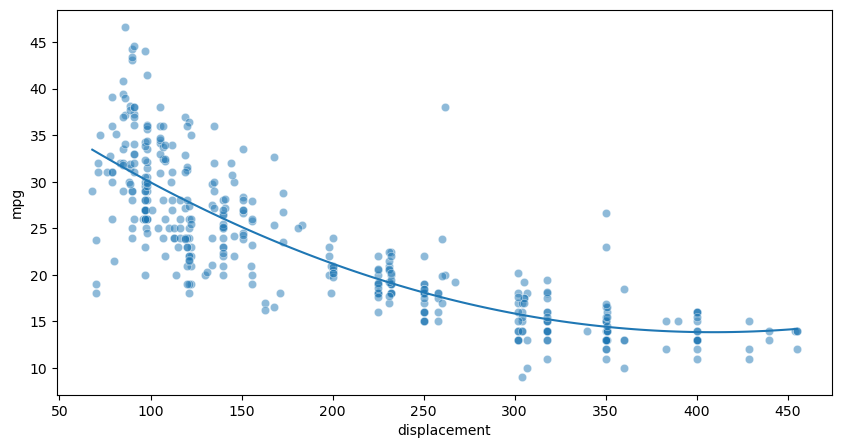

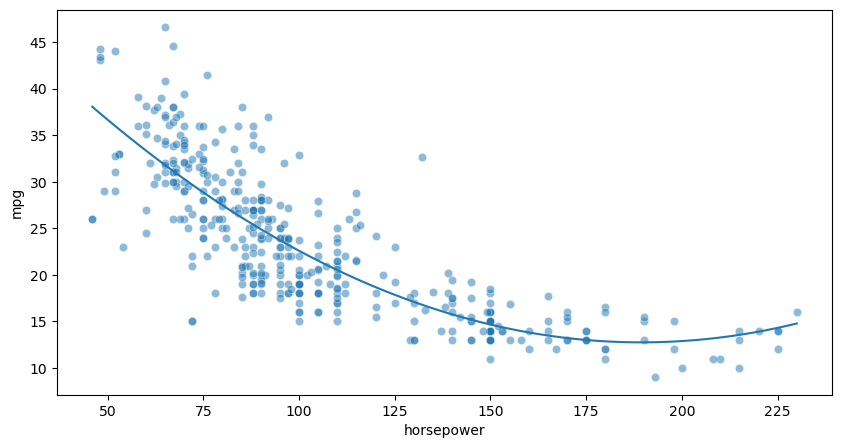

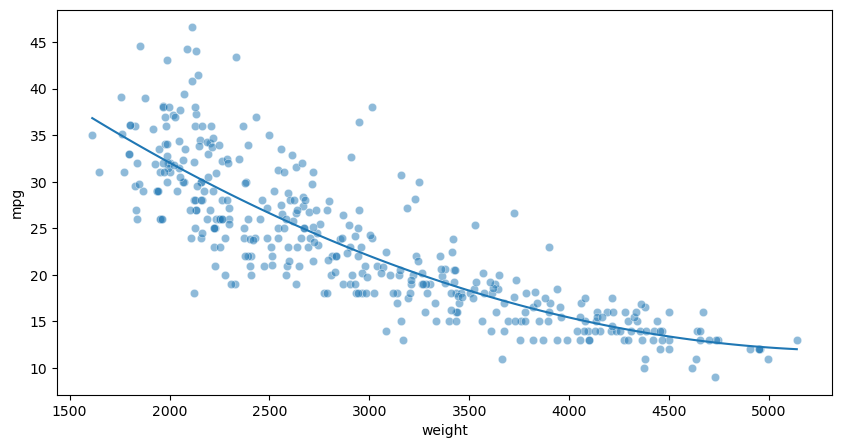

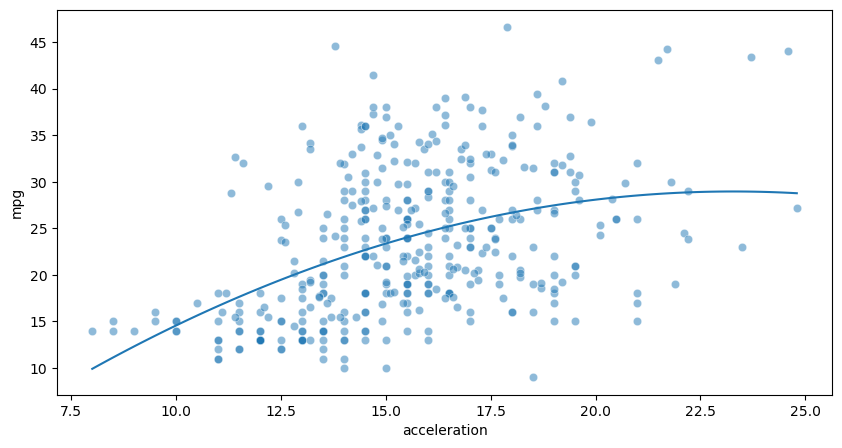

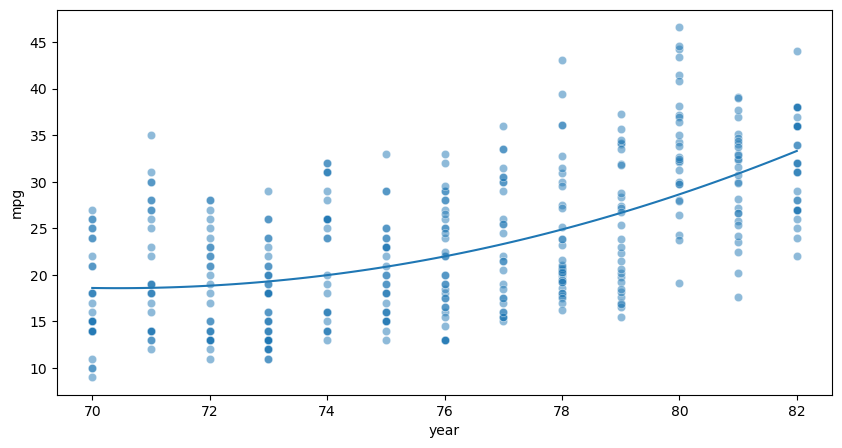

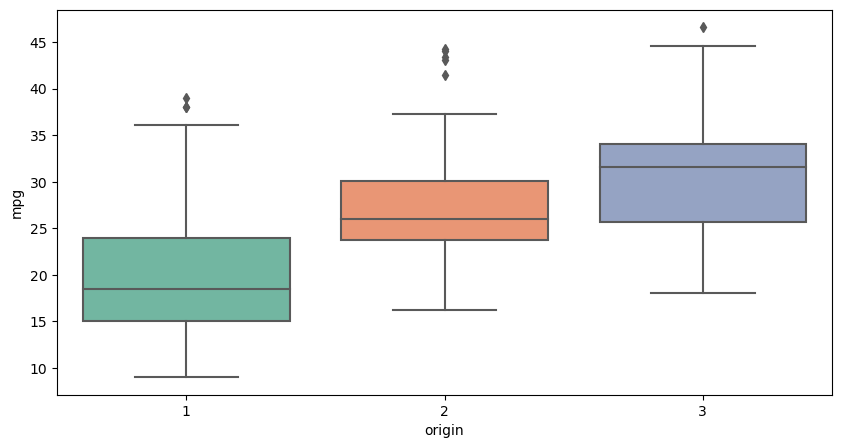

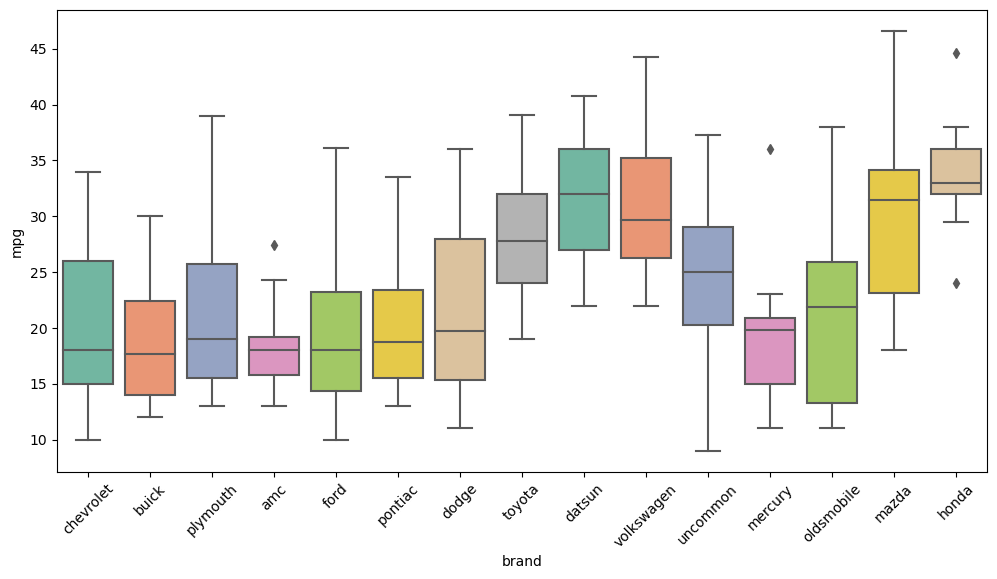

In [55]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="cylinders", y="mpg")

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="displacement", y="mpg", alpha=0.5)
order = 2
poly_fit = np.polyfit(df["displacement"], df["mpg"], order)
poly_eq = np.poly1d(poly_fit)
x_values = np.linspace(df["displacement"].min(), df["displacement"].max(), 100)
y_values = poly_eq(x_values)
plt.plot(x_values, y_values)

plt.figure(figsize=(10, 5))
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df.dropna(subset=["horsepower", "mpg"], inplace=True)
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
sns.scatterplot(data=df, x="horsepower", y="mpg", alpha=0.5)
order = 2
poly_fit = np.polyfit(df["horsepower"], df["mpg"], order)
poly_eq = np.poly1d(poly_fit)
x_values = np.linspace(df["horsepower"].min(), df["horsepower"].max(), 100)
y_values = poly_eq(x_values)
plt.plot(x_values, y_values)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="weight", y="mpg", alpha=0.5)
order = 2
poly_fit = np.polyfit(df["weight"], df["mpg"], order)
poly_eq = np.poly1d(poly_fit)
x_values = np.linspace(df["weight"].min(), df["weight"].max(), 100)
y_values = poly_eq(x_values)
plt.plot(x_values, y_values)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="acceleration", y="mpg", alpha=0.5)
order = 2 
poly_fit = np.polyfit(df["acceleration"], df["mpg"], order)
poly_eq = np.poly1d(poly_fit)
x_values = np.linspace(df["acceleration"].min(), df["acceleration"].max(), 100)
y_values = poly_eq(x_values)
plt.plot(x_values, y_values)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="year", y="mpg", alpha=0.5)
order = 2 
poly_fit = np.polyfit(df["year"], df["mpg"], order)
poly_eq = np.poly1d(poly_fit)
x_values = np.linspace(df["year"].min(), df["year"].max(), 100)
y_values = poly_eq(x_values)
plt.plot(x_values, y_values)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="origin", y="mpg", palette="Set2")

df["brand"] = df["name"].apply(lambda x: x.split()[0])
brand_mapping = {
    "vokswagen": "volkswagen",
    "vw": "volkswagen",
    "toyouta": "toyota",
    "chevroelt": "chevrolet",
    "chevy": "chevrolet",
    "maxda": "mazda"
}
df["brand"] = df["brand"].replace(brand_mapping)
brand_counts = df["brand"].value_counts()
uncommon_brands = brand_counts.index[brand_counts < 9]
df.loc[df["brand"].isin(uncommon_brands), "brand"] = "uncommon"

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="brand", y="mpg", palette="Set2")
plt.xticks(rotation=45)

plt.show()

The relationships are pretty strong, and I highly suspect that we will see increased performance with a non-linear methodology when predicting mpg.